# Metodo Runge-Kutta

## Iniciar paquetes del programa

Usamos la biblioteca **pandas** para mostrar resultados en tablas.

Usamos **matplotlib** para mostrar funcion en grafico.

**Numpy** para guardar los arreglos numericos.

**Math** para disponer de más operaciones.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Definir función diferencial

Definimos la función diferencial que aproximaremos mediante el método. Usamos parametros **x** e **y**.


⚠ **IMPORTANTE** ⚠:

Si la funcion que vamos a aproximar no contiene parametro **y**, lo recomendable es darle valor aleatorio en el algoritmo.

En este caso, la función por defecto utiliza parametro **y**

In [14]:
def funcion(x:float, y:float):
    return (math.sqrt(y) * x)

## Asignar valores iniciales
Asignamos el valor de h (diferencial de x), y valores iniciales de x e y.

También hay que asignar la cantidad de iteraciones que queremos.

In [15]:
# Iteraciones:
i = 5

# Diferencial de x
h = .2

# X e Y iniciales:
x0 = 1
y0 = 4

## Ejecución del algoritmo

In [25]:
# Listas para utilizar en dataframe y grafico

# La lista x_i contiene todos los x_i a usar, desde antes de comenzar a iterar
# Los obtenemos a partir del metodo linspace de numpy
# Los parametros son: np.linspace(inicio,fin,cantidad_de_valores)
# El parametro *fin* se incluye en el arreglo
x_i = np.linspace(x0,x0 + i*h,h)

# MUCHO CUIDADO: creamos un np array "empty", que en realidad contiene numeros aleatorios
# Hay que asegurarse de sobreescribir todos durante la iteracion
y_i = np.empty(i)

# Mismo tipo de arreglo para cada k
k_1 = np.empty(i)
k_2 = np.empty(i)
k_3 = np.empty(i)
k_4 = np.empty(i)

# Arreglo de error aproximado (lleno de ceros al principio)
error = np.zeros(i)


# Metemos los primeros valores en los arreglos x_i e y_i
x_i[0] = x0
y_i[0] = y0

# ------------------------------------------------------------------------

# Iteraciones

for n in range(i-1):
    k_1[n] = funcion(x_i[n],y_i[n])
    k_2[n] = funcion(x_i[n] + h / 2, y_i[n] + h * k_1[n] / 2)
    k_3[n] = funcion(x_i[n] + h / 2, y_i[n] + h * k_2[n] / 2)
    k_4[n] = funcion(x_i[n] + h, y_i[n] + h * k_3[n])
    y_i[n+1] = y_i[n] + 1/6 * (k_1[n] + 2*k_2[n] + 2*k_3[n] + k_4[n]) * h
    error[n+1] = math.fabs(100 * ( y_i[n+1] - y_i[n] ) / y_i[n+1])



# Inicializamos el dataframe que llenaremos con datos de la iteracion
# El metodo np.around redondea a la cantidad de decimales del segundo parametro
df = pd.DataFrame({
    'xi' : np.around(x_i,3),
    'k1' : np.around(k_1,3),
    'k2' : np.around(k_2,3),
    'k3' : np.around(k_3,3),
    'k4' : np.around(k_4,3),
    'yi' : np.around(y_i,3),
    'error aprox' : np.around(error,3)
})
print(df)


    xi     k1     k2     k3     k4     yi  error aprox
0  1.0  2.000  2.254  2.261  2.532  4.000        0.000
1  1.2  2.532  2.820  2.829  3.136  4.452       10.155
2  1.4  3.136  3.463  3.474  3.824  5.018       11.270
3  1.6  3.824  4.197  4.210  4.608  5.712       12.158
4  1.8  1.800  1.800  1.800  1.800  6.554       12.840


## Mostramos gráfico 📈
Ejecutar el codigo para ver gráficamente el resultado

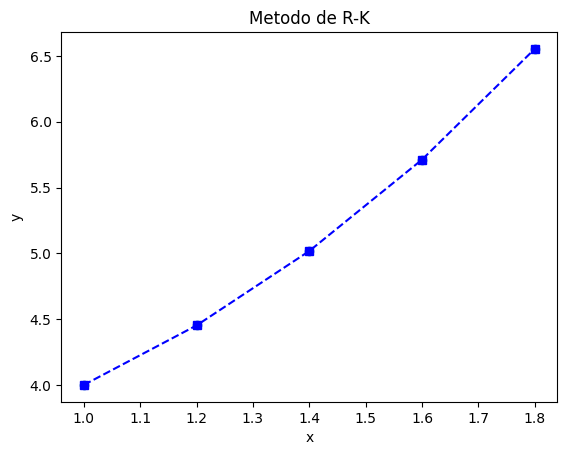

In [22]:
plt.title('Metodo de R-K')
plt.xlabel('x')
plt.ylabel('y')

## Puntos
plt.scatter(x_i,y_i)
# Union de los puntos
plt.plot(x_i,y_i,'s--b')